In [1]:
import numpy as np
from matplotlib import  pyplot as plt
plt.rcParams['axes.labelsize']=14
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

In [2]:
#自制数据
X=2*np.random.rand(100,1)
y = 4+3*X + np.random.randn(100,1)

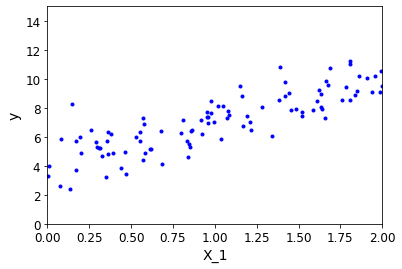

In [3]:
#查看数据
plt.plot(X,y,'b.')
plt.xlabel('X_1')
plt.ylabel('y')
plt.axis([0,2,0,15])#x，y轴的取值范围
plt.show()

In [4]:
X_b=np.c_[np.ones((100,1)),X]#c_  r_数据的拼接
#求Xt*X的逆
thrta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
thrta_best

array([[4.10498225],
       [2.93345349]])

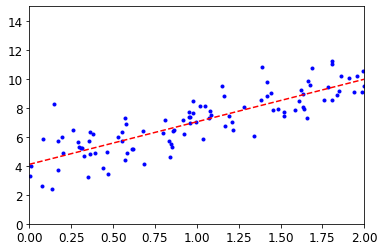

In [6]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(thrta_best)
y_predict
'''
array([[ 4.10721205],
[10.15670234]])
'''
#预测值差不多
plt.plot(X,y,'b.')
plt.plot(X_new_b[:,1],y_predict,'r--')
plt.axis([0,2,0,15])
plt.show()

In [7]:
#使用sklearn
from sklearn.linear_model import LinearRegression
Line_reg = LinearRegression()

In [8]:
Line_reg.fit(X,y)
print(Line_reg.coef_)#特征
print(Line_reg.intercept_)#标量

[[2.93345349]]
[4.10498225]


In [9]:
eta=0.1
n_iterations=1000
m=100#样本个数
theta = np.random.randn(2,1)

In [10]:
for iteration in range(n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta = theta-eta*gradients

In [11]:
theta

array([[4.10498225],
       [2.93345349]])

In [12]:
X_new_b.dot(theta)

array([[4.10498225],
       [9.97188923]])

In [13]:
theta_path_bgf = []
def plot_gradiant_descent(theta,eta,theta_path = None):
    m = len(X_b)
    plt.plot(X,y,'b.')
    n_iterations=1000
    for iteration in range(n_iterations):
        y_predict = X_new_b.dot(theta)
        plt.plot(X_new,y_predict,'r--')
        gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
        theta = theta-eta*gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel('X_1')
    plt.axis([0,2,0,15])
    plt.title(f'eta={eta}')

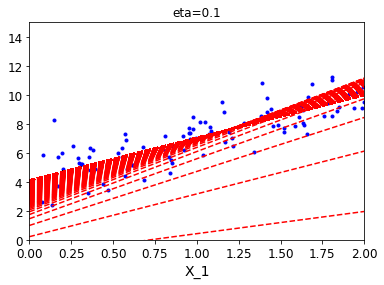

In [14]:
theta = np.random.randn(2,1)
# plt.figure(figsize=(10,4))
# plt.subplot(131)
# plot_gradiant_descent(theta,eta=0.02)
# plt.subplot(132)
plot_gradiant_descent(theta,eta=0.1,theta_path=theta_path_bgf)
# plt.subplot(133)
# plot_gradiant_descent(theta,eta=0.5)
plt.show()

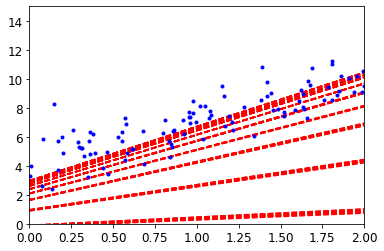

In [15]:
theta_path_rgf = []
m = len(X_b)
n_epochs = 50 #衰减策略：在学习过程中先快后慢

t0 = 5
t1 = 50

theta = np.random.randn(2,1)
#在迭代的过程中动态的调整学习率
def learning_shcedule(t):
    return t0/(t1+t)
for epoch in range(n_epochs):#50次迭代，每次迭代所有样本的个数(m)
    for i in range(m):
        #只画前20
        if epoch < 10 and  i < 10:
            y_predict = X_new_b.dot(theta)
            plt.plot(X_new,y_predict,'r--')
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)
        eta=learning_shcedule(n_epochs*m+i)
        theta = theta -eta*gradients
        theta_path_rgf.append(theta)
plt.plot(X,y,'b.')  
plt.axis([0,2,0,15])
plt.show()

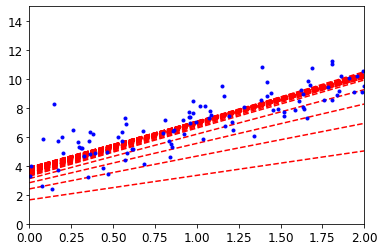

In [16]:
theta_path_mgd = []
n_iterations = 50
minibatch = 16

theta = np.random.randn(2,1)
m = len(X_b)
t=0
for epoch in range(n_epochs):#50次迭代，每次迭代所有样本的个数(m)
    #每次循环对数据进行重新洗牌，保证随机性
    shuffled_iundex = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_iundex]
    y_shuffled = y[shuffled_iundex]
    for i in range(0,m,minibatch):
        if epoch < 10 :
            y_predict = X_new_b.dot(theta)
            plt.plot(X_new,y_predict,'r--')
        t+=1
        xi = X_b_shuffled[i:i+minibatch]
        yi = y_shuffled[i:i+minibatch]
        gradients = 2/minibatch*xi.T.dot(xi.dot(theta)-yi)
        # print(gradients)
        #学习率逐步减小
        eta = learning_shcedule(t)
        theta = theta -eta*gradients
        theta_path_mgd.append(theta)
plt.plot(X,y,'b.')  
plt.axis([0,2,0,15])
plt.show()
    

In [17]:
theta

array([[4.06210514],
       [2.97087383]])

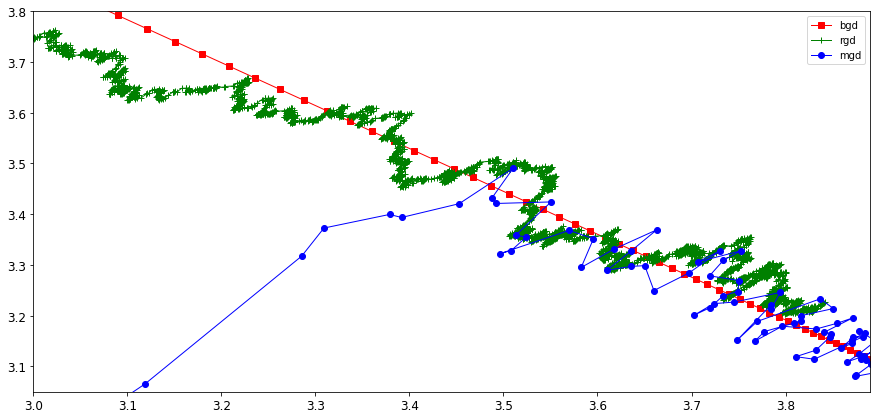

In [18]:
theta_path_bgf=np.array(theta_path_bgf)
theta_path_mgd=np.array(theta_path_mgd)
theta_path_rgf=np.array(theta_path_rgf)
plt.figure(figsize=(15,7))
plt.plot(theta_path_bgf[:,0],theta_path_bgf[:,1],'r-s',linewidth=1,label='bgd')
plt.plot(theta_path_rgf[:,0],theta_path_rgf[:,1],'g-+',linewidth=1,label='rgd')
plt.plot(theta_path_mgd[:,0],theta_path_mgd[:,1],'b-o',linewidth=1,label='mgd')
plt.legend(loc='upper right')
plt.axis([3,3.89,3.05,3.8])
plt.show()

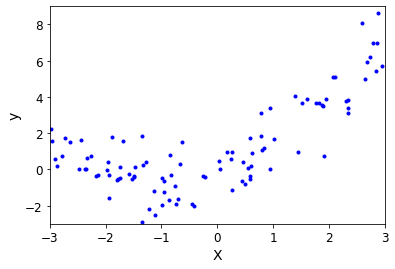

In [19]:
data_len = 100
#指定种子  确保每次随机一样
np.random.seed(100)
X = 6*np.random.rand(m,1)-3
y = 0.5*X**2+X+np.random.randn(m,1)
plt.plot(X,y,'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.axis([-3,3,-3,9])
plt.show()

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2,include_bias=False)
X_ploy = poly.fit_transform(X)
X_ploy[0]

array([0.26042965, 0.0678236 ])

In [21]:
from sklearn.linear_model import LinearRegression
line_reg = LinearRegression()
line_reg.fit(X_ploy,y)
print(line_reg.coef_)
print(line_reg.intercept_)
#coef 0 ---x  1---x**2  intercept---常数项

[[0.95406518 0.50130709]]
[-0.15679364]


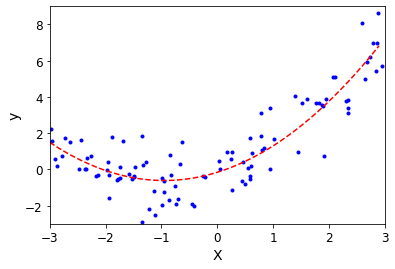

In [22]:
plt.plot(X,y,'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.axis([-3,3,-3,9])
X_lab = np.arange(-3,3,0.1).reshape(60,1)
#注意coef是一个矩阵
#也可以使用np.linespace(-3,3,100).reshape(100,1)
#-3，3中间分割100份
#y_lab = line_reg.intercept_+line_reg.coef_[:,0]*X_lab+line_reg.coef_[:,1]*X_lab**2
#这里也可以使用PolynomialFeatures来获得多项式的值
X_lab_poly = poly.transform(X_lab)
y_lab = line_reg.predict(X_lab_poly)
plt.plot(X_lab,y_lab,'r--')
plt.show()

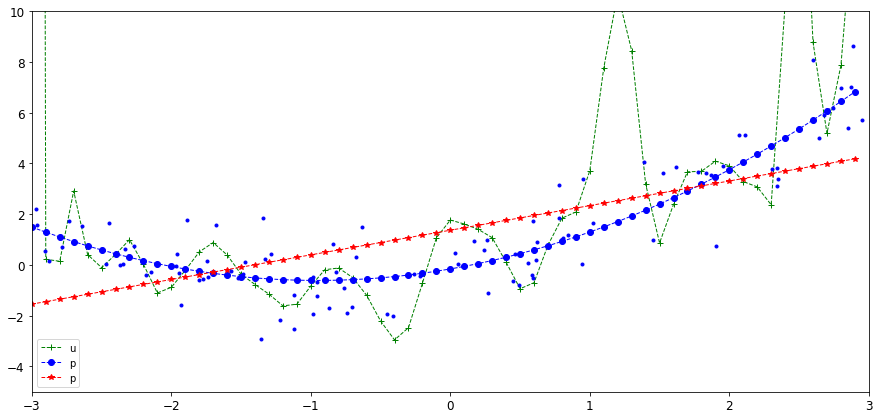

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
plt.figure(figsize=(15,7))

for style,width,degree in (('g--+',1,50),('b--o',1,2),('r--*',1,1)):
    poly_feature = PolynomialFeatures(degree=degree,include_bias=False)
    std = StandardScaler()
    line_reg = LinearRegression()
    #执行流水化操作
    pipe_reg = Pipeline([
        ('poly_feature',poly_feature),
        ('standard',std),
        ('line_reg',line_reg)
    ])
    pipe_reg.fit(X,y)
    y_new_2=pipe_reg.predict(X_lab)
    plt.plot(X_lab,y_new_2,style,label=str(degree),linewidth=width)
plt.legend('upper right')
plt.plot(X,y,'b.')
plt.axis([-3,3,-5,10])
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


def plot_learning_curves(model,X,y):
    X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=100)
    train_errors = []
    test_errors=[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict[:m]))
        test_errors.append(mean_squared_error(y_test,y_test_predict))
    plt.plot(np.sqrt(train_errors),'r--+',linewidth = 2 ,label='train_error')
    plt.plot(np.sqrt(test_errors),'g--o',linewidth = 2 ,label='test_errors')

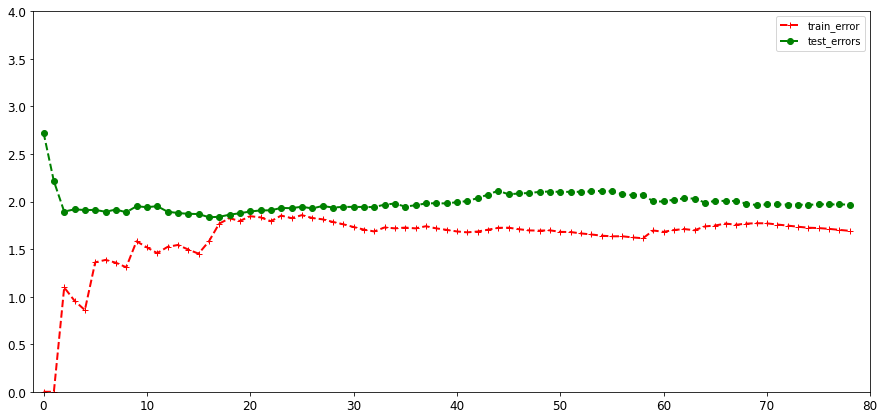

In [25]:
line_reg = LinearRegression()
plt.figure(figsize=(15,7))
plot_learning_curves(line_reg,X,y)
plt.axis([-1,80,0,4])
plt.legend()
plt.show()

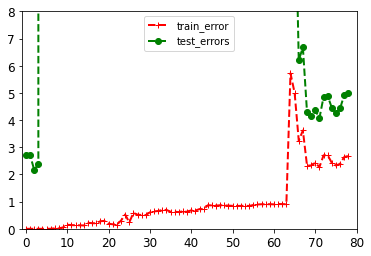

In [26]:
pipe_reg = Pipeline([
        ('poly_feature',PolynomialFeatures(degree=30,include_bias=False)),
        ('line_reg',LinearRegression())
    ])
plot_learning_curves(pipe_reg,X,y)
plt.axis([-1,80,0,8])
plt.legend()
plt.show()

In [68]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
np.random.seed(42)
m=20
X = 3*np.random.rand(m,1)
y = 0.5*X+np.random.randn(m,1)/1.5+1
X_new = np.linspace(0,3,100).reshape(100,1)

def plot_model(model_class , ploynomial , alphas ,**model_kargs):
    for alpha,style in zip(alphas,('b--','g--','r:')) :
        model = model_class(alpha,**model_kargs)
        if ploynomial:
            model = Pipeline([
            ('poly_feature',PolynomialFeatures(degree=15,include_bias=False)),
            ('Standard',StandardScaler()),
            ('line_reg',model)
            ])
        model.fit(X,y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new , y_new_regul,style,linewidth=lw,label=f'alpha ={alpha}')
    plt.plot(X,y,'b.')
    plt.legend()

d:\code\anaconda\envs\test\lib\site-packages\sklearn\pipeline.py:394: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
d:\code\anaconda\envs\test\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
d:\code\anaconda\envs\test\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.737e+00, tolerance: 9.295e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd

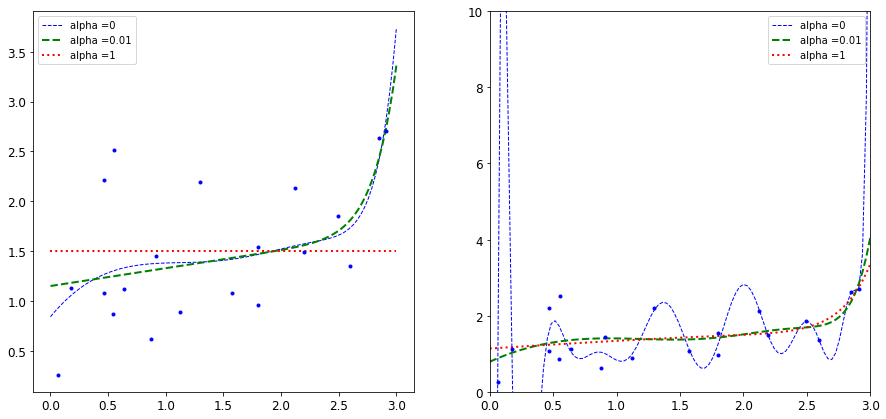

In [76]:
plt.figure(figsize=(15,7))
plt.subplot(121)
plot_model(Lasso,ploynomial=True,alphas=(0,0.01,1))
plt.subplot(122)
plot_model(Ridge,ploynomial=True,alphas=(0,0.01,1))
plt.axis([0,3,0,10])
plt.show()